In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('./dataset/Adulting1012016-2021.csv')

#Take interesting columns
df1=df[['selftext','num_comments','score','title']]
#drop those with text=NA
df1=df1.dropna(subset=['selftext'])
#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#drop duplicate
duplicate = df1.duplicated()
print('There are', duplicate.sum(), 'duplicated values.')
df1=df1.drop_duplicates()
len(df1)

There are 3 duplicated values.


198

In [2]:
#to lower-case

In [3]:
df1['selftext']=df1['selftext'].str.lower()
df1['selftext']

0      is it weird for an adult to wear a high school...
2      you’re moving out. great! whether it’s from ho...
3      hey!  you just moved into your first apartment...
4      this is the first part of a series of posts i’...
6      this is a place to learn all of the simple thi...
                             ...                        
279    hi all, i’m 19 and just scored my first time j...
283    hi all so this is my first post here and i’m a...
284    how does one go about getting their first apar...
285    so just before the pandemic kicked into high g...
286    i'm about to finish school and i still don't k...
Name: selftext, Length: 198, dtype: object

In [4]:
def remove_emoji(text):
    text = text.encode('ascii', 'ignore').decode()
    return text

In [5]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_emoji(x))
df1['selftext'].iloc[1]

"youre moving out. great! whether its from home or from the dorms into off campus housing there are few things you should know about renting an apartment or house. \n\n**basics**\n\n* the monthly cost to live not just the rental price. that is the baseline. the true cost is is rent + internet/cable + electricity + water + heat +...++ your monthly budget should account for all of these expenses. some properties include some or all utilities, others do not. factor that in when comparing rental costs. you can ask the utility what the average monthly bill at your address was in previous years when you sign up to get an idea of the cost.\n\n* most landlords insist that all tenants sign the same lease. this makes you and your friends/frenemies/randos you find through craigslist collectively responsible for the full rental amount. if your roommate cant pay on time you still owe the full amount. \n\n* you are all collectively responsible for damage to the property. the landlord is not a judge 

In [6]:
import re
def remove_other(x):
    x = re.sub("\$"," ", x) #remove $
    x = re.sub("https*\S+", " ", x) #remove url
    x = re.sub("\'\w+", '', x) #remove i'm,we're,let's after the '
    x = re.sub("[0-9]+", '', x) #remove numbers
    x = re.sub("\n",'', x)#remove newlines
    return x


In [7]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_other(x))
df1['selftext'].iloc[1]

'youre moving out. great! whether its from home or from the dorms into off campus housing there are few things you should know about renting an apartment or house. **basics*** the monthly cost to live not just the rental price. that is the baseline. the true cost is is rent + internet/cable + electricity + water + heat +...++ your monthly budget should account for all of these expenses. some properties include some or all utilities, others do not. factor that in when comparing rental costs. you can ask the utility what the average monthly bill at your address was in previous years when you sign up to get an idea of the cost.* most landlords insist that all tenants sign the same lease. this makes you and your friends/frenemies/randos you find through craigslist collectively responsible for the full rental amount. if your roommate cant pay on time you still owe the full amount. * you are all collectively responsible for damage to the property. the landlord is not a judge and doesnt care 

In [8]:
import nltk
from nltk.corpus import stopwords
#nltk.download("stopwords") #uncomment it when run it for the first time
stop_words = set(stopwords.words("english"))
print(stop_words) #all preloaded stopwords

{'d', 'did', 'same', 'his', 'll', 'o', 's', 'ourselves', "mustn't", 'm', 'once', 'because', 'doesn', 'at', "hadn't", 've', 'mustn', 'was', "you're", 'the', 'from', 'any', 'don', 'its', "haven't", 'under', 'so', 'shan', 'both', 'i', 'about', 'while', 'mightn', 'just', 'are', 'do', 'didn', 'if', 'below', 'ma', 'wasn', 'isn', 'himself', 'whom', 'theirs', 'will', "shouldn't", 'weren', 'had', 'out', 'hadn', 'that', 'above', 'other', 'after', "doesn't", 'needn', 'myself', 'you', 'until', 'she', 'should', 'itself', 'too', 'your', "didn't", 'why', 'against', 'is', 'it', 'how', 'own', "you've", 'down', 't', 'between', 'off', 'in', 'most', 'over', "needn't", 'this', 'can', 'there', 'shouldn', 'to', 'where', "should've", "that'll", 'no', 'during', 'y', "isn't", 'by', 'up', 'then', 'which', "wasn't", 'does', 'doing', 'wouldn', "don't", 'hers', 'themselves', 'am', 'all', 'before', 'won', "couldn't", 'who', 'than', 'we', 'through', 'him', 'few', 'into', 'our', "mightn't", 'yourself', 'an', 'as', "we

In [9]:
def remove_stopwords(text):
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

In [10]:
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
df1['selftext'].iloc[1]

'youre moving out. great! whether home dorms campus housing things know renting apartment house. **basics*** monthly cost live rental price. baseline. true cost rent + internet/cable + electricity + water + heat +...++ monthly budget account expenses. properties include utilities, others not. factor comparing rental costs. ask utility average monthly bill address previous years sign get idea cost.* landlords insist tenants sign lease. makes friends/frenemies/randos find craigslist collectively responsible full rental amount. roommate cant pay time still owe full amount. * collectively responsible damage property. landlord judge doesnt care broke shelf kitchen. care broken shelf. reach agreement roommates ideally anything happens damage deposits handled event assessed. * read lease. focus end tenancy section. leases require give notice days end lease intend continue renting. give notice many leases anticipate switching month-to-month tenancy. landlord assume plan move may end paying one

In [11]:
spec_chars = ["!",'“','"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–"]
for char in spec_chars:
    df1['selftext'] = df1['selftext'].str.replace(char, ' ')
    df1['selftext'] = df1['selftext'].str.split().str.join(" ")
df1['selftext'].iloc[1]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  


'youre moving out great whether home dorms campus housing things know renting apartment house basics monthly cost live rental price baseline true cost rent internet cable electricity water heat monthly budget account expenses properties include utilities others not factor comparing rental costs ask utility average monthly bill address previous years sign get idea cost landlords insist tenants sign lease makes friends frenemies randos find craigslist collectively responsible full rental amount roommate cant pay time still owe full amount collectively responsible damage property landlord judge doesnt care broke shelf kitchen care broken shelf reach agreement roommates ideally anything happens damage deposits handled event assessed read lease focus end tenancy section leases require give notice days end lease intend continue renting give notice many leases anticipate switching month to month tenancy landlord assume plan move may end paying one extra months occupancy follow lease read leas

In [12]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context


In [13]:
import nltk
#nltk.download('wordnet') #uncommented for 1st time running
from nltk.stem import WordNetLemmatizer

words=df1['selftext'][4].split()
lemmatizer = WordNetLemmatizer()
for word in words:
    print(word + " ---> " + lemmatizer.lemmatize(word))

first ---> first
part ---> part
series ---> series
posts ---> post
im ---> im
going ---> going
make ---> make
renting ---> renting
first ---> first
place ---> place
eventually ---> eventually
ill ---> ill
cover ---> cover
bunch ---> bunch
topics ---> topic
renting ---> renting
post ---> post
particular ---> particular
talks ---> talk
before ---> before
start ---> start
looking ---> looking
first ---> first
place ---> place
own ---> own
what ---> what
look ---> look
renting ---> renting
first ---> first
place ---> place
many ---> many
things ---> thing
often ---> often
get ---> get
overlooked ---> overlooked
youre ---> youre
first ---> first
moving ---> moving
own ---> own
everyone ---> everyone
knows ---> know
need ---> need
plan ---> plan
rent ---> rent
dont ---> dont
know ---> know
much ---> much
spending ---> spending
much ---> much
save ---> save
things ---> thing
post ---> post
mostly ---> mostly
based ---> based
experience ---> experience
hopefully ---> hopefully
help ---> help
f

In [14]:
def lemmatize(words):
    lemmatizer = WordNetLemmatizer()
    nwords=[]
    for word in words:
        word=lemmatizer.lemmatize(word)
        nwords.append(word)
    return ' '.join(nwords)

In [20]:
df1['selftext']= df1['selftext'].str.split().apply(lambda x: lemmatize(x))
df1['selftext'].iloc[1]
df1.to_csv('./adulting101_clean.csv')

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
vec=CountVectorizer()
counts=vec.fit_transform(df1['selftext'])
counts=counts.toarray()
count_df=pd.DataFrame(counts,columns=vec.get_feature_names())
big_df=pd.concat((df1,count_df),axis=1)
big_df.head()

,selftext,num_comments,score,title,aaa,abatement,abby,ability,able,about,...,younger,youngins,your,youre,yourself,youtube,youve,yr,zero,zone
0,weird adult wear high school championship ring,2.0,1.0,state championship ring,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,youre moving out great whether home dorm campu...,0.0,11.0,[101] Leases and Roommates 101,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,hey moved first apartment awesome congratulati...,3.0,13.0,"[101]Kitchen 101: What You Really, Really Need...",0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,17.0,0.0,0.0,2.0,0.0,0.0,0.0
4,first part series post im going make renting f...,3.0,11.0,[101]What to look at before renting your first...,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
import itertools
import collections
def count_words(text):
    all_words = list(itertools.chain(*text.str.split()))
    counts = collections.Counter(all_words)
    counts_df = pd.DataFrame(counts.most_common(100),
                            columns=['words', 'count'])

    return counts_df
print(count_words(df1['selftext'])['words'])


0        get
1       like
2       need
3       know
4       time
       ...  
95       two
96    saving
97     right
98         u
99       ask
Name: words, Length: 100, dtype: object


In [19]:
stop_words.update({'would','k','im','could','also',
                   'amp','much','one','like','get',
                   'since','etc','got','always',
                   'know','thing','really','dont',
                   'find','even','go',
                  })
df1['selftext']=df1['selftext'].apply(lambda x: remove_stopwords(x))
count_df=count_words(df1['selftext'])
count_df.head(30)

,words,count
0,need,147
1,time,125
2,car,121
3,want,118
4,job,100
5,make,99
6,money,94
7,going,90
8,year,86
9,pay,85


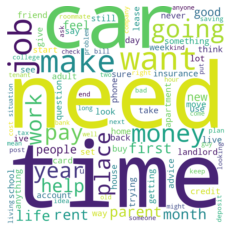

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a list of word
text=' '.join(count_df.words)

# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=1000, margin=0,background_color='white').generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [53]:
import plotly.express as px
fig1 = px.bar(count_df.head(10), x='words', y='count', title="Top 10 words in adulting101")
fig1.show()

From one-gram analysis of adulting 101 subreddit, we can see a focus on getting jobs and buying cars since most of the keywords are related to these two topics. However, the most frequently appeared word "time" don't have a clear topic attribution.

In [65]:
index3=df1[df1['selftext'].str.contains("need")].index
df.iloc[index3].sort_values(by='num_comments',ascending=False).head(20)

,Unnamed: 0,author,created_utc,domain,full_link,num_comments,over_18,score,selftext,subreddit,title,num_crossposts
216,216,whoeverthehell,1582487221,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,29,False,3,"Just the title, I'm almost 18 and moving out s...",Adulting101,What did you wish you knew before moving into ...,0.0
276,276,goodoldted,1597924117,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,16,False,1,they told me to come here from r/legaladvice. ...,Adulting101,"roommate can't be evicted (CA, USA)",0.0
199,199,measely_opossum,1586118899,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,16,False,1,So I’m (f) gonna be moving into my first apart...,Adulting101,A few questions,0.0
174,174,rural_dentist,1594569885,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,15,False,1,I feel like a piece of shit for feeling upset ...,Adulting101,SO’s dad ended up in ER last night. SO said he...,0.0
171,171,Madam_Morbid_,1595542112,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,14,False,5,"(Hi, this is my first reddit post, so I'm stil...",Adulting101,Do I NEED To Have A Credit Card?,0.0
194,194,LividCurrent,1588512101,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,12,False,1,"(again, I really hope this is a good subreddit...",Adulting101,Question about social security card (sorry I k...,0.0
72,72,expatinpa,1533694168,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,10,False,11,"A really sharp knife. Yes I know, so boring. B...",Adulting101,What you really absolutely need for a basic ki...,0.0
204,204,plawwwy,1585672516,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,10,False,1,How much does it cost you to live alone in an ...,Adulting101,Moving out (of course after all this tragic st...,0.0
277,277,blueskies209,1597876926,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,9,False,1,I’ve moved down south about 5 years ago with m...,Adulting101,Family wants me to move back home,0.0
84,84,Napalmenator,1533577478,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,9,False,19,This is a place to learn all of the simple thi...,Adulting101,Welcome to Adulting 101,0.0


In [67]:
(df.iloc[204]['selftext'],df.iloc[204]['title'])

('How much does it cost you to live alone in an apartment, buy the essentials needed (appliances etc) buy your own groceries in a month?? Thank you!',
 'Moving out (of course after all this tragic stuff)')

In [68]:
index3=df1[df1['selftext'].str.contains("car")].index
df.iloc[index3].sort_values(by='num_comments',ascending=False).head(20)

,Unnamed: 0,author,created_utc,domain,full_link,num_comments,over_18,score,selftext,subreddit,title,num_crossposts
219,219,dukeshellington,1581596416,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,26,False,1,Is my toilet going to explode? I didn’t think ...,Adulting101,I just???flushed a toilet paper roll???down th...,0.0
59,59,Pema_marie,1536352614,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,18,False,11,"I'm an adult, but I usually don't fill my gas ...",Adulting101,I just accidentally put diesel in my car?!,0.0
276,276,goodoldted,1597924117,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,16,False,1,they told me to come here from r/legaladvice. ...,Adulting101,"roommate can't be evicted (CA, USA)",0.0
171,171,Madam_Morbid_,1595542112,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,14,False,5,"(Hi, this is my first reddit post, so I'm stil...",Adulting101,Do I NEED To Have A Credit Card?,0.0
68,68,Napalmenator,1533921502,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,13,False,18,The slow cooker is the king of easy. Literally...,Adulting101,Easy Recipes - Slow Cooker,0.0
94,94,BlueiraBlue128,1561264703,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,12,False,11,"Hi, all! I am a few months shy of turning 20, ...",Adulting101,In need of Adulting avice,0.0
89,89,Juniper102,1563032494,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,12,False,8,I've never bought a car before so I have no id...,Adulting101,How should I go about buying a car?,0.0
194,194,LividCurrent,1588512101,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,12,False,1,"(again, I really hope this is a good subreddit...",Adulting101,Question about social security card (sorry I k...,0.0
173,173,Ferda13-3,1594920446,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,10,False,1,"So I’m buying a car for the first time, I want...",Adulting101,Car Buying Question,0.0
72,72,expatinpa,1533694168,self.Adulting101,https://www.reddit.com/r/Adulting101/comments/...,10,False,11,"A really sharp knife. Yes I know, so boring. B...",Adulting101,What you really absolutely need for a basic ki...,0.0


In [75]:
(df.iloc[89]['selftext'],df.iloc[89]['title'])

("I've never bought a car before so I have no idea what my best options should be. Does Carfax actually work? What should I avoid? How does car insurance work? I only have about $1000 right now so I can't buy a brand new one or anything, but I'm not sure what qualifies a used car as bad/waste of time or money.",
 'How should I go about buying a car?')